/tmp/ipykernel_22839/3476752569.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 10))
/tmp/ipykernel_22839/3476752569.py:42: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(time/1e6, x_target, y_target, '.', label = "target", marker = 'x', markersize = 10)


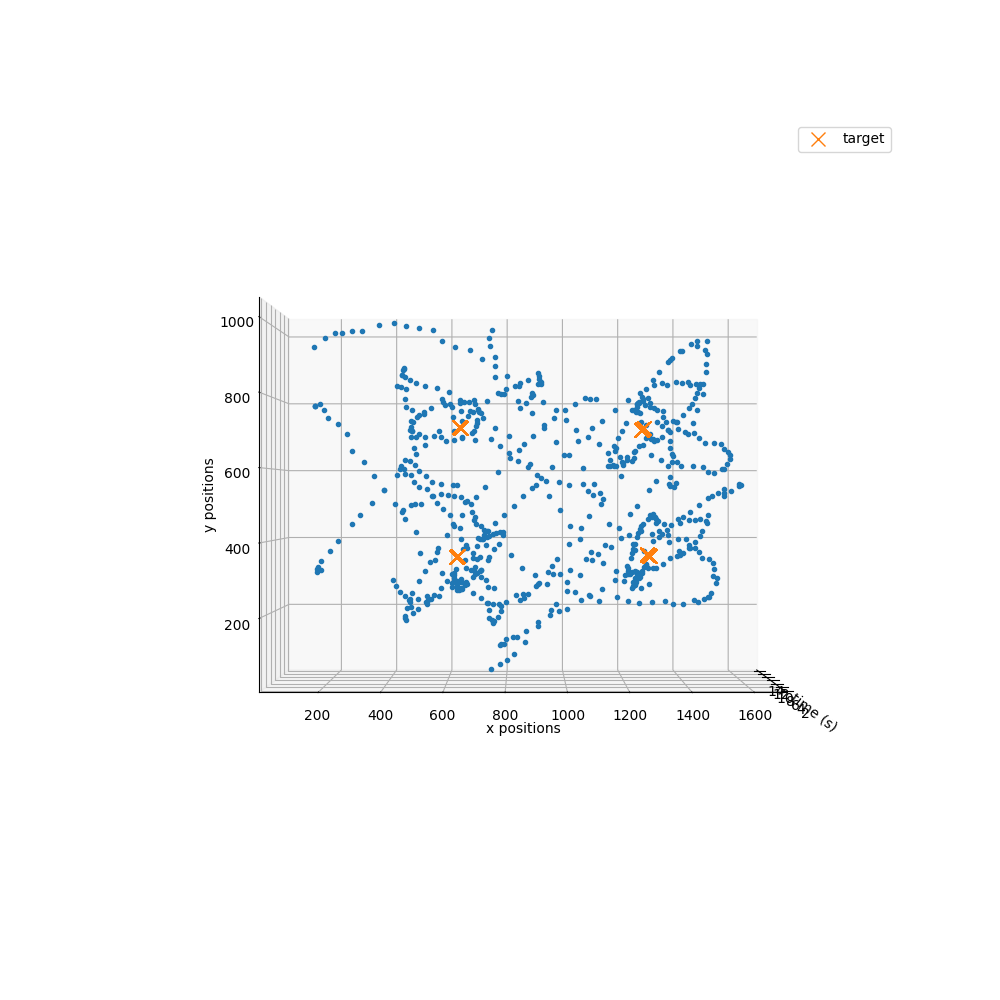

In [23]:
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib widget
file = "model_trace_2x2_5h_pert.log"

def read_data(file, log_dir = "../logs/"):
    with open(log_dir + file, "r") as f:
        data = json.load(f)
        return data
        
data = read_data(file)

def clean_data(data):
        
    raw_time = np.array(data['time'])

    idx = np.where(raw_time<0.1666)[0]

    # time = np.diff(time[idx], prepend=0)
    time = np.delete(raw_time, idx)
    disp_y = np.array(data["disp_y"])
    disp_x = np.array(data["disp_x"])
    x_target = data['target_x']
    y_target = data['target_y']

    return time, disp_x, disp_y, x_target, y_target

time , disp_x, disp_y, x_target, y_target = clean_data(data)


def plot_trajectory(time, disp_x, disp_y, x_target, y_target):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(time/1e6, data["pos_x"], data["pos_y"], '.')
    ax.set_xlabel("time (s)")
    ax.set_ylabel("x positions")
    ax.set_zlabel("y positions")

    x_target = data['target_x']
    y_target = data['target_y']
    plt.plot(time/1e6, x_target, y_target, '.', label = "target", marker = 'x', markersize = 10)

    ax.view_init(elev=0, azim=180, roll=0)
    ax.yaxis.set_inverted(True)
    ax.legend()
    plt.show()


plot_trajectory(time, disp_x, disp_y, x_target, y_target)

In [24]:
disp_x.shape
# time.shape

(692,)

In [25]:
print("data['disp_x'] ", data['disp_x'][:23])
print("data['pos_x'] ", data['pos_x'][:23])


min(np.diff(data['pos_x'], prepend = data['pos_x'][0]))


data['disp_x']  [0.0, 0.0, 0.0, 18.5792579650879, 11.4433755874634, 14.6990747451782, 31.8822746276855, 27.4727230072021, 17.4536819458008, 36.650936126709, 32.4895515441895, 34.4011764526367, 35.7217483520508, 32.2372970581055, 36.1143836975098, 12.700891494751, 47.1316070556641, 24.6204795837402, 36.8074111938477, 41.6665916442871, 21.6892471313477, 25.6390419006348, 18.067943572998]
data['pos_x']  [182.0, 182.0, 182.0, 200.579254150391, 212.02262878418, 226.721710205078, 258.603973388672, 286.076690673828, 303.530364990234, 340.181304931641, 372.670867919922, 407.072052001953, 442.793792724609, 475.031097412109, 511.145477294922, 523.846374511719, 570.977966308594, 595.598449707031, 632.405883789062, 674.072448730469, 695.76171875, 721.400756835938, 739.468688964844]


-1187.790191650393

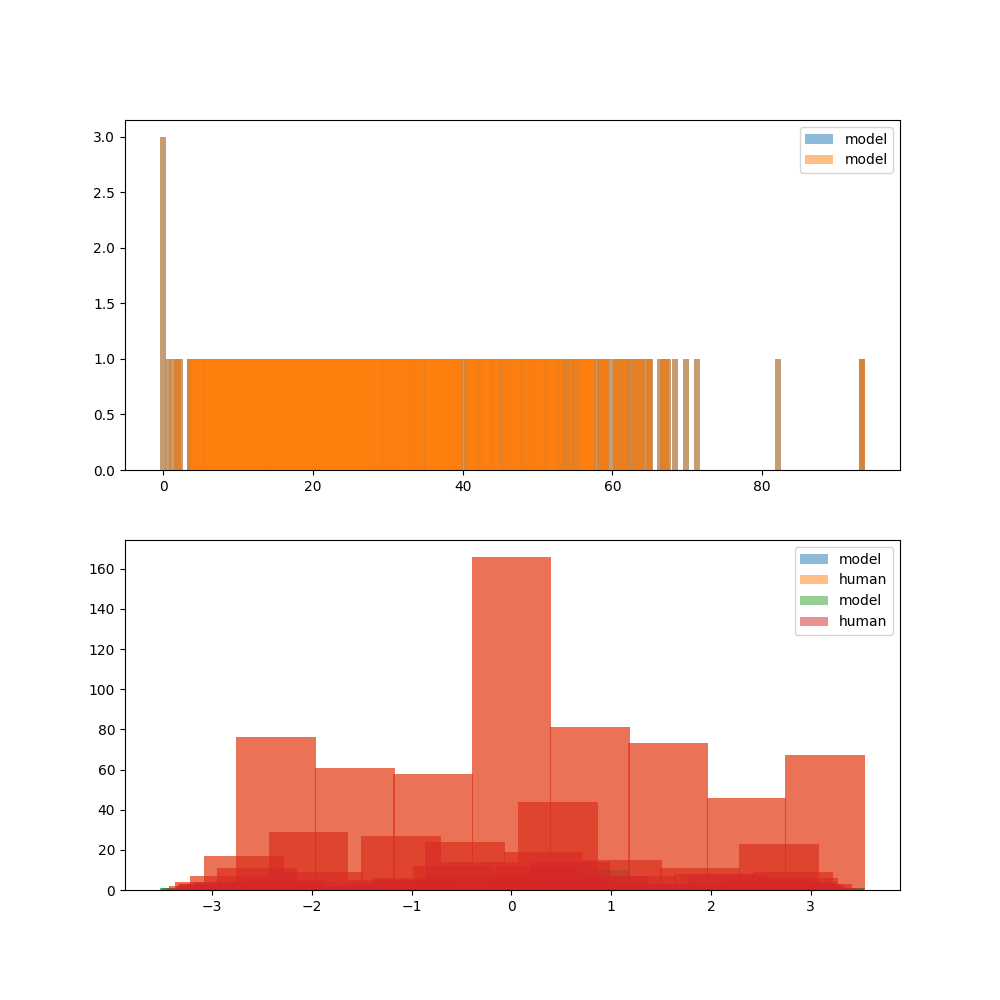

In [26]:
# compare the displcament between human and model 

# get data
human_file = "human_trace_2x2_5h.log"
process_file = "model_trace_2x2_5h_pert.log"

def plot_angle_distribution(fig, data, label, cmap = 'viridis'):

    colors = plt.colormaps[cmap].colors

    ax = fig.add_subplot(projection='polar')
    x, count = np.unique(data, return_counts=True)
    ax.bar(x, count/max(count), colors[-1], label = "model", alpha= 0.5)

    theta = np.arange(0, 2*np.pi, 0.2)
    ax.set_thetagrids(np.degrees(theta), labels=np.round(theta, 2))

human_data = read_data(human_file)
process_data = read_data(process_file)


fig = plt.figure(figsize=(10, 10))

axt = fig.add_subplot(2,1,1)
axb = fig.add_subplot(2,1,2)

process_disp_x = np.array(process_data['disp_x'])
process_disp_y = np.array(process_data['disp_y'])

human_disp_x = np.array(human_data['disp_x'])
human_disp_y = np.array(human_data['disp_y'])

human_mag_disp = np.sqrt(human_disp_x**2 + human_disp_y**2)
process_mag_disp = np.sqrt(process_disp_x**2 + process_disp_y**2)

human_angle_disp = np.arctan2(human_disp_y, human_disp_x)
process_angle_disp = np.arctan2(process_disp_y, process_disp_x)

h_mag_values, h_mag_count = np.unique(human_mag_disp, return_counts=True)
p_mag_values, p_mag_count = np.unique(process_mag_disp, return_counts=True)

h_angle_values, h_angle_count = np.unique(human_angle_disp, return_counts=True)
p_angle_values, p_angle_count = np.unique(process_angle_disp, return_counts=True)


width = 0.25
offset_= 1

for i in range(2):

    # rect = axt.bar(h_mag_values, h_mag_count, alpha = 0.5, label = "human")
    rect = axt.bar(p_mag_values, p_mag_count, alpha = 0.5, label = "model")
    
    rect = axb.bar(p_angle_values, p_angle_count, label = "model", alpha = 0.5)
    rect = axb.bar(h_angle_values, h_angle_count, label = "human", alpha = 0.5)
    # rect = axb.bar(human_angle_disp, width, label = "human")

# plt.bar(h_mag_values, h_mag_count, width = width, label = "human")

axb.legend()
axt.legend()
# plt.close()

Text(0.5, 1.0, 'normalized angle distribution')

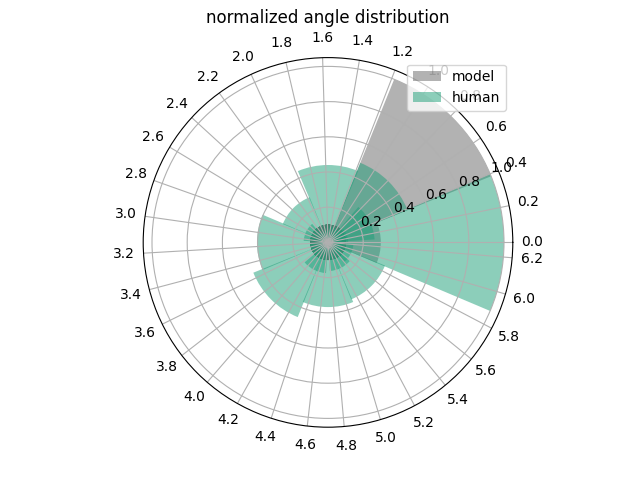

In [27]:
colors = plt.colormaps['Dark2'].colors
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
ax.bar(p_angle_values, p_angle_count/max(p_angle_count), color = colors[-1], label = "model", alpha= 0.5)
ax.bar(h_angle_values, h_angle_count/max(h_angle_count), color = colors[0], label = "human", alpha= 0.5)

ax.legend()
theta = np.arange(0, 2*np.pi, 0.2)
ax.set_thetagrids(np.degrees(theta), labels=np.round(theta, 2))
ax.set_title("normalized angle distribution")

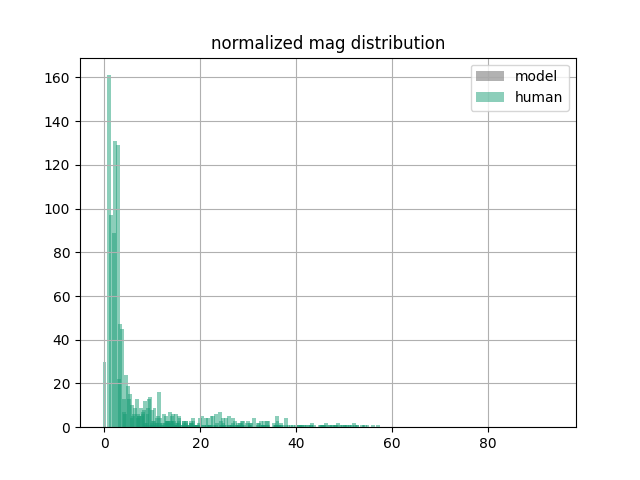

In [56]:
fig = plt.figure()
ax = fig.add_subplot()

ax.bar(p_mag_values, p_mag_count/sum(p_mag_count), color = colors[-1], label = "model", alpha= 0.5)
ax.bar(h_mag_values, h_mag_count, color = colors[0], label = "human", alpha= 0.5)
ax.grid()
ax.set_title("normalized mag distribution")
ax.legend()

array([ 8.48528137, 36.12478374, 51.31276644, ..., 11.40175425,
        7.28010989,  3.60555128])

# PLOTTING OF A NEW TRAJ

In [ ]:
# plotting code
def plot_angle_distribution(fig ,data, label, color_index = 0, trans = "prop", precision = 1, cmap = 'Dark2'):

    
    colors = plt.colormaps[cmap].colors

    ax = fig.add_subplot(projection='polar')
    data = np.round(data, precision)
    x, count = np.unique(data, return_counts=True)
    if trans == "prop":
        count = count/sum(count)
        title = "probability angle distribution"
        legend = "proportion"
    elif trans == "normalized":
        count = count/sum(count)
        title = "normalized angle distribution"
        legend = "normalized values"
    else:
        title = "angle distribution"
        legend = None
    title += f" rounded at 1e-{precision}"

    ax.bar(x, count, color=colors[color_index], width = 0.3, label = "model", alpha= 0.5)

    theta = np.arange(0, 2*np.pi, 0.2)
    ax.set_thetagrids(np.degrees(theta), labels=np.round(theta, 2))

    label_position=ax.get_rlabel_position()
    if legend is not None:
        ax.text(np.radians(label_position+10),ax.get_rmax()/2.,legend,
        rotation=label_position,ha='center',va='center')

    ax.set_title(title)

def plot_magnitude_distribution(fig ,data, label, color_index = 0, trans = 'prop', precision = 1, cmap = 'Dark2'):

    colors = plt.colormaps[cmap].colors

    ax = fig.add_subplot()
    data =  np.round(data, precision)
    x, count = np.unique(data, return_counts=True)
    
    if trans == "prop":
        count = count/sum(count)
        title = "probability magnitude distribution"
        legend = "prob"
    elif trans == "normalized":
        count = count/sum(count)
        title = "normalized magnitude distribution"
        legend = "normalized"
    else:
        title = "magnitude distribution"
        legend = None

    title += f" rounded at 1e-{precision}"
    print(x.shape)
    print("count = ", count.shape)
    ax.bar(x, count, color=colors[color_index], width=0.5, label = "model", alpha= 0.5)
    ax.grid()
    ax.set_title(title)
    ax.set_xlabel("Magnitude of displacement")
    ax.set_ylabel("Normalized count")

def clean_data(data):
        
    raw_time = np.array(data['time'])

    idx = np.where(raw_time<0.1666)[0]

    # time = np.diff(time[idx], prepend=0)
    time = np.delete(raw_time, idx)
    pos_x = np.array(data["pos_x"])
    pos_y = np.array(data["pos_y"])
    disp_y = np.array(data["disp_y"])
    disp_x = np.array(data["disp_x"])
    x_target = data['target_x']
    y_target = data['target_y']

    return time, pos_x, pos_y, disp_x, disp_y, x_target, y_target

# time , disp_x, disp_y, x_target, y_target = clean_data(data)


def plot_trajectory(time, pos_x, pos_y, disp_x, disp_y, x_target, y_target):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(time/1e6, data["pos_x"], data["pos_y"], '.')
    ax.set_xlabel("time (s)")
    ax.set_ylabel("x positions")
    ax.set_zlabel("y positions")

    x_target = data['target_x']
    y_target = data['target_y']
    plt.plot(time/1e6, x_target, y_target, '.', label = "target", marker = 'x', markersize = 10)

    ax.view_init(elev=0, azim=180, roll=0)
    ax.yaxis.set_inverted(True)
    ax.legend()
    plt.show()

# def get_by_target_reaching(time, disp_x, disp_y, x_target, y_target):
#     target = np.vstack((x_target, y_target))
    

/tmp/ipykernel_22839/1384199784.py:94: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(time/1e6, x_target, y_target, '.', label = "target", marker = 'x', markersize = 10)


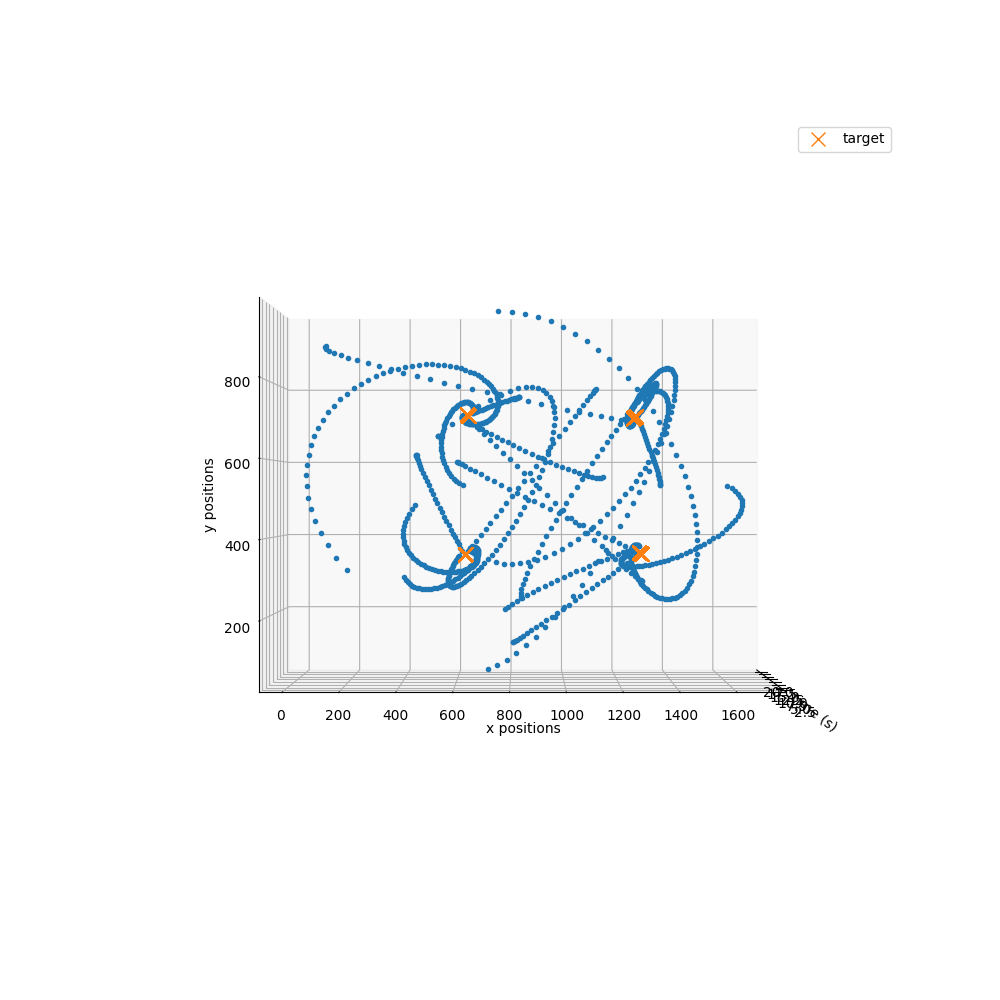

(348,)
count =  (348,)
data count :  1089


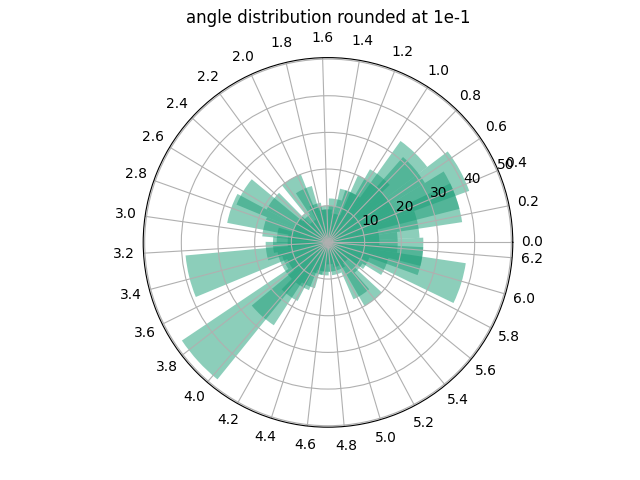

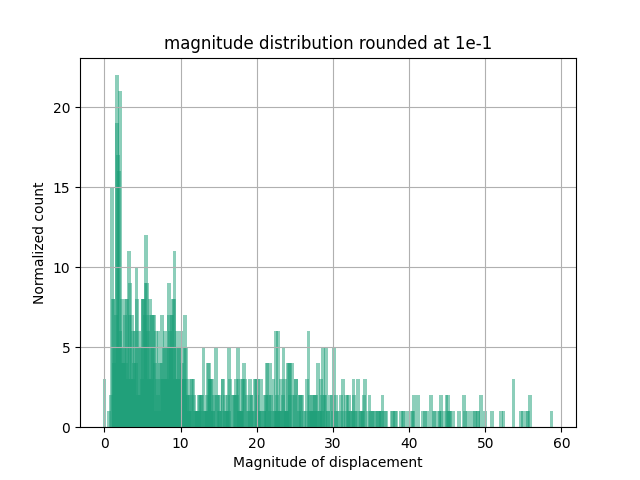

In [65]:
file = "model_trace_2x2_5h2025-05-22T13:25:52.log"
# file = "human_trace_2x2_5h.log"



data = read_data(file)

time , pos_x, pos_y, disp_x, disp_y, x_target, y_target = clean_data(data)

plot_trajectory(time, pos_x, pos_y, disp_x, disp_y, x_target, y_target)


angle = np.arctan2(disp_y, disp_x)

plot_angle_distribution(plt.figure(), angle, "angle", "Dark2")


mag = np.sqrt(disp_x**2 + disp_y**2)

plot_magnitude_distribution(plt.figure(), mag, "magnitude", "Dark2")
print("data count : ", len(time))